In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

1.	(1.0đ) Đọc file CSV vào một DataFrame và hiển thị thông tin tổng quan (info(), describe()).

In [2]:
df = pd.read_csv("../data/diem_thi_thpt_2022.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982726 entries, 0 to 982725
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        982726 non-null  int64  
 1   toan       982726 non-null  float64
 2   ngu_van    968865 non-null  float64
 3   ngoai_ngu  870073 non-null  float64
 4   vat_li     325505 non-null  float64
 5   hoa_hoc    327342 non-null  float64
 6   sinh_hoc   322172 non-null  float64
 7   lich_su    647514 non-null  float64
 8   dia_li     645308 non-null  float64
 9   gdcd       553490 non-null  float64
 10  tentinh    982726 non-null  object 
 11  Khoi       858736 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 90.0+ MB


In [4]:
df.describe()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,9.827260e+05,982726.000000,968865.000000,870073.00000,325505.000000,327342.000000,322172.000000,647514.000000,645308.000000,553490.000000
mean,2.757435e+07,6.466254,6.514857,5.15709,6.723873,6.704068,5.019212,6.329588,6.670291,8.033813
std,1.915794e+07,1.675435,1.375123,1.94926,1.441836,1.600228,1.448217,1.603538,1.207680,1.065624
min,1.000001e+06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000177e+07,5.400000,5.750000,3.60000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000
50%,2.801872e+07,6.800000,6.500000,4.80000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000
75%,4.400525e+07,7.800000,7.500000,6.60000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000
max,6.400659e+07,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


2.	(1.0đ) Kiểm tra xem có dòng trùng lặp trên sbd không. Nếu có, hãy loại bỏ.

In [5]:
# len(df["sbd"]) - df["sbd"].nunique()

df["sbd"].duplicated().sum()

np.int64(0)

3.	(1.0đ) Kiểm tra và đếm số lượng giá trị NaN trong mỗi cột.

In [6]:
df.isna().sum()

sbd               0
toan              0
ngu_van       13861
ngoai_ngu    112653
vat_li       657221
hoa_hoc      655384
sinh_hoc     660554
lich_su      335212
dia_li       337418
gdcd         429236
tentinh           0
Khoi         123990
dtype: int64

4.	(1.0đ) Điền giá trị NaN của các môn học bằng trung vị (median) của từng môn.

In [7]:
mon_hoc = ["toan", "ngu_van", "ngoai_ngu", "vat_li", "hoa_hoc", "sinh_hoc", "lich_su", "dia_li", "gdcd"]
df[mon_hoc] = df[mon_hoc].fillna(df[mon_hoc].median())
df.isna().sum()

sbd               0
toan              0
ngu_van           0
ngoai_ngu         0
vat_li            0
hoa_hoc           0
sinh_hoc          0
lich_su           0
dia_li            0
gdcd              0
tentinh           0
Khoi         123990
dtype: int64

5.	(1.0đ) Tạo một cột "Diem_TB" là điểm trung bình của tất cả các môn học.

In [8]:
df["Diem_TB"] = df[mon_hoc].mean(axis=1)  
df.head(10)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB
0,1000001,3.6,5.00,4.0,7.0,7.0,4.75,2.75,6.00,8.75,thành phố hà nội,KHXH,5.427778
1,1000002,8.4,6.75,7.6,7.0,7.0,4.75,8.50,7.50,8.25,thành phố hà nội,KHXH,7.305556
2,1000003,5.8,7.50,5.0,7.0,7.0,4.75,7.25,5.50,8.75,thành phố hà nội,KHXH,6.505556
3,1000004,7.4,7.50,8.6,7.0,7.0,4.75,7.50,6.50,7.50,thành phố hà nội,KHXH,7.083333
4,1000005,7.2,8.50,9.0,7.0,7.0,4.75,8.00,8.50,8.25,thành phố hà nội,KHXH,7.577778
5,1000006,6.8,8.50,9.4,7.0,7.0,4.75,7.00,7.50,9.25,thành phố hà nội,KHXH,7.466667
6,1000007,7.2,6.00,5.0,7.0,7.0,4.75,8.00,7.50,9.00,thành phố hà nội,KHXH,6.827778
7,1000008,8.0,8.00,8.0,7.0,7.0,4.75,5.25,7.00,7.00,thành phố hà nội,KHXH,6.888889
8,1000009,2.6,5.25,4.8,7.0,7.0,4.75,5.25,6.75,8.25,thành phố hà nội,NaN,5.738889
9,1000010,8.8,8.00,7.0,7.0,7.0,4.75,6.50,6.50,6.75,thành phố hà nội,KHXH,6.922222


6.	(1.0đ) Tìm học sinh có tổng điểm cao nhất và thấp nhất.

In [9]:
df["Tong_Diem"] = df[mon_hoc].sum(axis=1)

In [10]:
max = df["Tong_Diem"].max()
min = df["Tong_Diem"].min()

In [11]:
df[df["Tong_Diem"] == max]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB,Tong_Diem
747768,45003303,9.4,9.75,9.0,8.5,10.0,9.5,6.5,6.75,8.25,tỉnh ninh thuận,KHTN,8.627778,77.65


In [12]:
df[df["Tong_Diem"] == min]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB,Tong_Diem
382744,21012204,1.8,2.5,2.2,7.0,7.0,4.75,1.0,2.25,1.0,tỉnh hải dương,KHXH,3.277778,29.5


7.	(1.0đ) Đếm số lượng học sinh đạt điểm 10 môn Toán.

In [13]:
df[df["toan"] == 10]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB,Tong_Diem
12359,1012943,10.0,7.50,6.6,7.75,9.00,8.50,6.50,6.75,8.25,thành phố hà nội,KHTN,7.872222,70.85
15129,1015777,10.0,5.75,4.8,7.00,6.50,4.75,6.50,6.75,8.25,thành phố hà nội,NaN,6.700000,60.30
17187,1017880,10.0,5.00,9.2,7.00,8.25,6.75,6.50,6.75,8.25,thành phố hà nội,KHTN,7.522222,67.70
18974,1019676,10.0,6.25,9.8,10.00,8.25,7.00,6.50,6.75,8.25,thành phố hà nội,KHTN,8.088889,72.80
24544,1025302,10.0,8.00,7.6,9.25,8.75,6.00,6.50,6.75,8.25,thành phố hà nội,KHTN,7.900000,71.10
67215,1068510,10.0,5.50,8.0,10.00,10.00,6.75,6.50,6.75,8.25,thành phố hà nội,KHTN,7.972222,71.75
101095,2005344,10.0,6.00,4.8,8.00,9.75,9.00,6.50,6.75,8.25,thành phố hồ chí minh,NaN,7.672222,69.05
101404,2005655,10.0,7.50,4.8,9.50,9.50,8.00,6.50,6.75,8.25,thành phố hồ chí minh,NaN,7.866667,70.80
122585,2026884,10.0,8.00,7.0,9.75,9.75,8.00,6.50,6.75,8.25,thành phố hồ chí minh,KHTN,8.222222,74.00
137983,2042310,10.0,7.00,8.6,7.25,10.00,8.75,6.50,6.75,8.25,thành phố hồ chí minh,KHTN,8.122222,73.10


8.	(1.0đ) Xác định 5 tỉnh có số lượng học sinh tham gia thi nhiều nhất.

In [14]:
so_luong_thi_sinh_thi_df = df["tentinh"].value_counts().reset_index()
so_luong_thi_sinh_thi_df.columns = ["Tên Tỉnh", "Số lượng"]
so_luong_thi_sinh_thi_df = so_luong_thi_sinh_thi_df.sort_values(by="Số lượng", ascending=False)
so_luong_thi_sinh_thi_df.head()

,Tên Tỉnh,Số lượng
0,thành phố hà nội,95769
1,thành phố hồ chí minh,84094
2,tỉnh thanh hóa,36933
3,tỉnh nghệ an,36240
4,tỉnh đồng nai,31153


9.	(1.0đ) Tính trung bình điểm Toán theo từng tỉnh (tentinh).

In [15]:
diem_toan_trb_theo_tinh_df = df.groupby(["tentinh"]).agg({"toan": "mean"}).reset_index()
diem_toan_trb_theo_tinh_df.columns = ["Tên tỉnh", "Điểm toán trung bình"]
diem_toan_trb_theo_tinh_df

,Tên tỉnh,Điểm toán trung bình
0,thành phố cần thơ,6.486747
1,thành phố hà nội,6.765761
2,thành phố hải phòng,6.916197
3,thành phố hồ chí minh,7.057077
4,thành phố đà nẵng,6.749634
...,...,...
58,tỉnh điện biên,5.481237
59,tỉnh đăk nông,6.017245
60,tỉnh đắk lắk,5.862827
61,tỉnh đồng nai,6.293352


10.	(1.0đ) Tính hệ số tương quan giữa Toán và các môn KHTN (Lý, Hóa, Sinh).

In [16]:
corr = df[['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']].corr()
corr

,toan,vat_li,hoa_hoc,sinh_hoc
toan,1.000000,0.110218,0.083774,0.185699
vat_li,0.110218,1.000000,0.401751,0.116716
hoa_hoc,0.083774,0.401751,1.000000,0.387642
sinh_hoc,0.185699,0.116716,0.387642,1.000000


11.	(1.5đ) Dùng phương pháp IQR để phát hiện outliers của môn Toán:
- Tính Q1, Q3, IQR.
- Xác định Lower Bound (Q1 - 1.5*IQR) và Upper Bound (Q3 + 1.5*IQR).
- Lọc danh sách học sinh có điểm Toán nằm ngoài khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR].


In [17]:
q1 = df["toan"].quantile(0.25)
q3 = df["toan"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Q1: ", q1)
print("Q3: ", q3)
print("IQR: ", iqr)
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

Q1:  5.4
Q3:  7.8
IQR:  2.3999999999999995
Lower bound:  1.8000000000000012
Upper bound:  11.399999999999999


In [18]:
df[df["toan"] < lower_bound]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB,Tong_Diem
263,1000269,1.6,4.75,4.8,7.0,7.00,4.75,6.50,6.00,8.25,thành phố hà nội,NaN,5.627778,50.65
370,1000391,1.8,4.75,4.8,7.0,7.00,4.75,4.50,5.50,8.25,thành phố hà nội,NaN,5.372222,48.35
380,1000421,1.8,5.00,4.8,7.0,7.00,4.75,3.25,7.25,8.25,thành phố hà nội,NaN,5.455556,49.10
458,1000593,1.8,3.75,4.8,7.0,7.00,4.75,5.75,6.75,8.25,thành phố hà nội,NaN,5.538889,49.85
783,1000923,1.8,5.00,4.8,7.0,7.00,4.75,6.50,6.75,8.25,thành phố hà nội,NaN,5.761111,51.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981684,64005466,1.8,4.25,2.6,7.0,7.00,4.75,4.25,4.75,4.25,tỉnh hậu giang,KHXH,4.516667,40.65
981702,64005484,1.4,4.50,2.8,7.0,7.00,4.75,4.50,6.25,5.25,tỉnh hậu giang,KHXH,4.827778,43.45
982104,64005887,1.6,6.25,3.4,7.0,7.00,4.75,5.25,7.25,8.75,tỉnh hậu giang,KHXH,5.694444,51.25
982301,64006098,1.6,6.50,4.8,3.0,2.75,4.75,6.50,6.75,8.25,tỉnh hậu giang,NaN,4.988889,44.90


In [19]:
df[df["toan"] > upper_bound]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB,Tong_Diem


12.	(1.5đ) Vẽ Boxplot cho điểm Toán để trực quan hóa outliers.

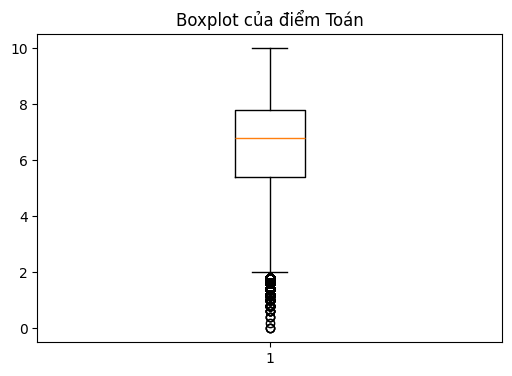

In [20]:
plt.figure(figsize=(6,4))
plt.boxplot(x=df["toan"])
plt.title("Boxplot của điểm Toán")
plt.show()

13.	(1.5đ) Tạo một cột "Outlier_Toan" với giá trị:
- True nếu điểm Toán là outlier.
-	False nếu không.


In [21]:
def is_outlier(x):
  if x < lower_bound or x > upper_bound:
    return True
  else: 
    return False

df["Outlier_Toan"] = df["toan"].apply(is_outlier)
df[df["Outlier_Toan"] == True]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi,Diem_TB,Tong_Diem,Outlier_Toan
263,1000269,1.6,4.75,4.8,7.0,7.00,4.75,6.50,6.00,8.25,thành phố hà nội,NaN,5.627778,50.65,True
370,1000391,1.8,4.75,4.8,7.0,7.00,4.75,4.50,5.50,8.25,thành phố hà nội,NaN,5.372222,48.35,True
380,1000421,1.8,5.00,4.8,7.0,7.00,4.75,3.25,7.25,8.25,thành phố hà nội,NaN,5.455556,49.10,True
458,1000593,1.8,3.75,4.8,7.0,7.00,4.75,5.75,6.75,8.25,thành phố hà nội,NaN,5.538889,49.85,True
783,1000923,1.8,5.00,4.8,7.0,7.00,4.75,6.50,6.75,8.25,thành phố hà nội,NaN,5.761111,51.85,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981684,64005466,1.8,4.25,2.6,7.0,7.00,4.75,4.25,4.75,4.25,tỉnh hậu giang,KHXH,4.516667,40.65,True
981702,64005484,1.4,4.50,2.8,7.0,7.00,4.75,4.50,6.25,5.25,tỉnh hậu giang,KHXH,4.827778,43.45,True
982104,64005887,1.6,6.25,3.4,7.0,7.00,4.75,5.25,7.25,8.75,tỉnh hậu giang,KHXH,5.694444,51.25,True
982301,64006098,1.6,6.50,4.8,3.0,2.75,4.75,6.50,6.75,8.25,tỉnh hậu giang,NaN,4.988889,44.90,True


14.	(1.5đ) So sánh phân phối điểm Toán giữa các khối "KHTN" và "KHXH" bằng Boxplot.

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\2355859484.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x=[toan_KHTN, toan_KHXH], labels=["KHTN", "KHXH"])


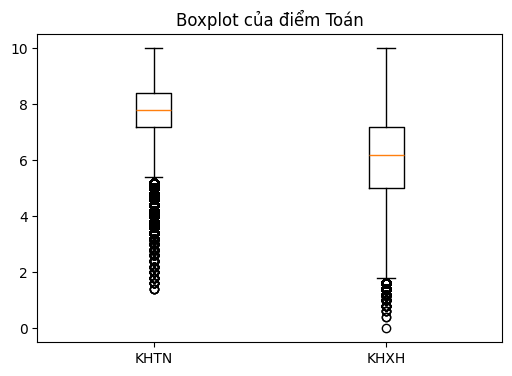

In [22]:
toan_KHTN = df[df["Khoi"] == "KHTN"]["toan"]
toan_KHXH = df[df["Khoi"] == "KHXH"]["toan"]


plt.figure(figsize=(6,4))
plt.boxplot(x=[toan_KHTN, toan_KHXH], labels=["KHTN", "KHXH"])
plt.title("Boxplot của điểm Toán")
plt.show()

15.	(1.5đ) Đếm số lượng học sinh theo từng khối (Khoi).

In [23]:
so_luong_theo_khoi = df["Khoi"].value_counts().reset_index()
so_luong_theo_khoi.columns = ["Khối", "Số lượng"]
so_luong_theo_khoi


,Khối,Số lượng
0,KHXH,549574
1,KHTN,309162


16.	(1.5đ) Xác định khối nào có điểm Toán trung bình cao hơn.

In [24]:
toan_trb_khxh = df[df["Khoi"] == "KHXH"]["toan"].mean()
toan_trb_khtn = df[df["Khoi"] == "KHTN"]["toan"].mean()

print("Toán trung bình KHXH: ", toan_trb_khxh)
print("Toán trung bình KHTN: ", toan_trb_khtn)


Toán trung bình KHXH:  6.040746469083329
Toán trung bình KHTN:  7.680011773762622


17.	(1.5đ) Xác định 5 tỉnh có điểm trung bình môn Toán cao nhất và thấp nhất.

In [25]:
# diem_toan_trb_theo_tinh_df.sort_values(by="Điển toán trung bình", ascending=False)
diem_toan_trb_theo_tinh_df.sort_values(by="Điểm toán trung bình", ascending= False).head(10)

,Tên tỉnh,Điểm toán trung bình
34,tỉnh nam định,7.402176
7,tỉnh bình dương,7.145337
3,thành phố hồ chí minh,7.057077
36,tỉnh ninh bình,6.999479
48,tỉnh thái bình,6.997300
20,tỉnh hà nam,6.981421
56,tỉnh vĩnh phúc,6.919863
2,thành phố hải phòng,6.916197
14,tỉnh bắc ninh,6.875251
51,tỉnh tiền giang,6.820937


In [26]:
diem_toan_trb_theo_tinh_df.sort_values(by="Điểm toán trung bình", ascending= True).head(10)

,Tên tỉnh,Điểm toán trung bình
19,tỉnh hà giang,4.696837
16,tỉnh cao bằng,5.173134
46,tỉnh sơn la,5.287387
22,tỉnh hòa bình,5.341972
58,tỉnh điện biên,5.481237
33,tỉnh lạng sơn,5.530194
13,tỉnh bắc kạn,5.551524
57,tỉnh yên bái,5.621939
52,tỉnh trà vinh,5.745022
53,tỉnh tuyên quang,5.790142


19.	(1.5đ) Vẽ Histogram thể hiện phân phối điểm trung bình (Diem_TB).

<Axes: >

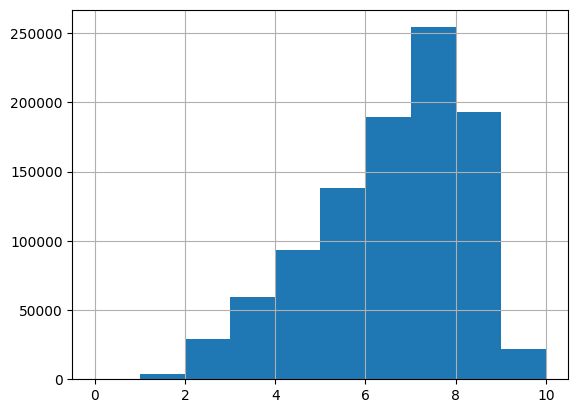

In [27]:
df["toan"].hist()

20.	(1.5đ) Vẽ Bar chart thể hiện số lượng học sinh theo từng tỉnh (tentinh).

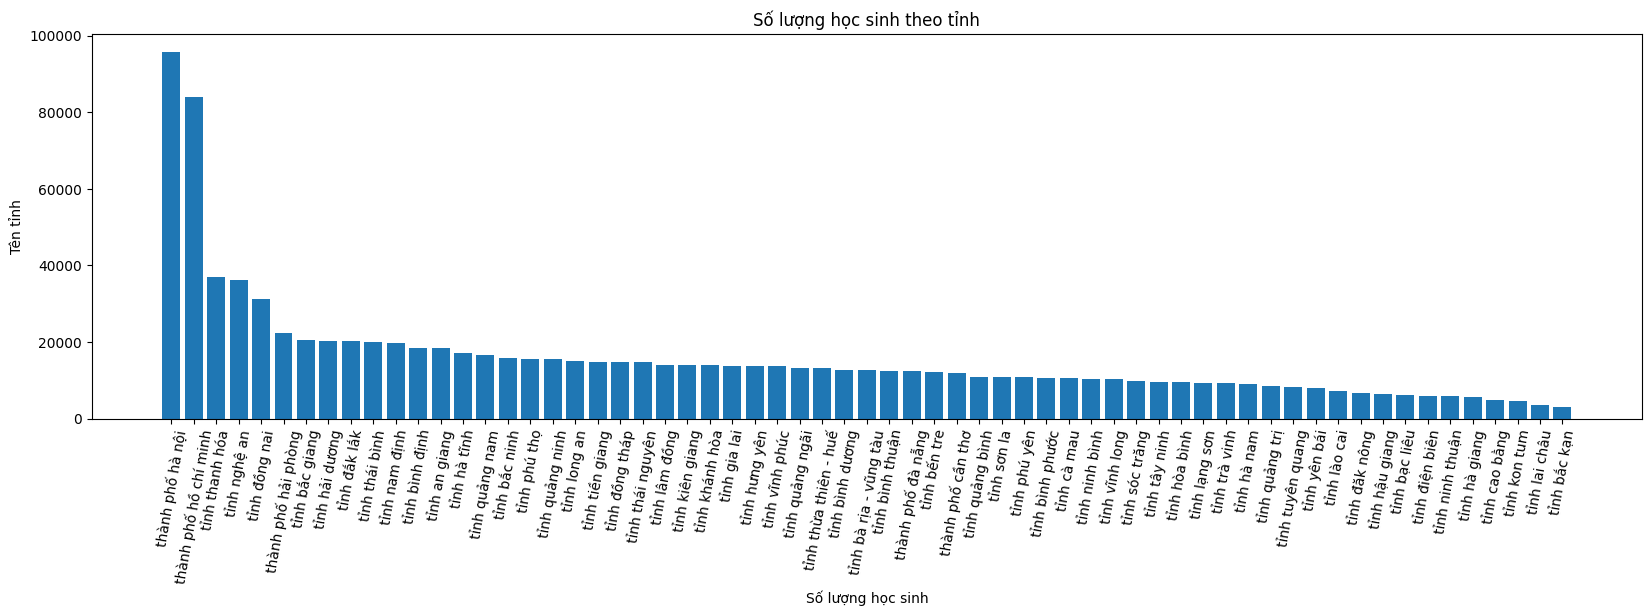

In [28]:
plt.figure(figsize=(20, 5))
plt.bar(so_luong_thi_sinh_thi_df["Tên Tỉnh"], so_luong_thi_sinh_thi_df["Số lượng"])

plt.xlabel("Số lượng học sinh")
plt.xticks(rotation=80)
plt.ylabel("Tên tỉnh")
plt.title("Số lượng học sinh theo tỉnh")


plt.show()

21.	(1.5đ) Vẽ Pie chart thể hiện tỷ lệ học sinh theo từng khối (Khoi).

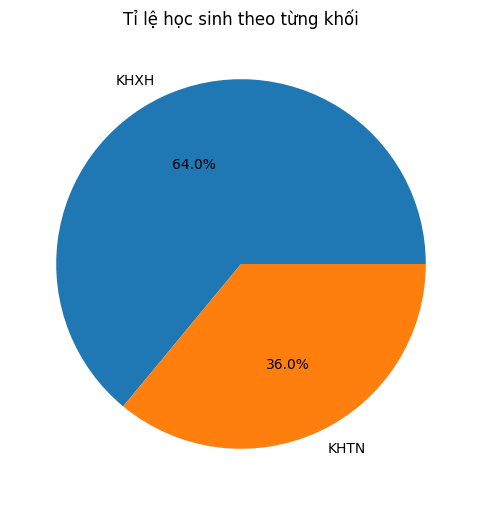

In [29]:
labels = so_luong_theo_khoi["Khối"]
sizes = so_luong_theo_khoi["Số lượng"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Tỉ lệ học sinh theo từng khối")
plt.show()